## Importing relevant packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement_dataset.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
# removing irrelevant attributes
df.drop(['Hostel'], axis = 1, inplace = True)

In [6]:
# converting data from string to integer for statistical analysis and predictions

df['Gender'].replace({'Male':'1','Female':'0'},inplace = True)

In [7]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1
1,21,0,Computer Science,0,7,1,1
2,22,0,Information Technology,1,6,0,1
3,21,1,Information Technology,0,8,1,1
4,22,1,Mechanical,0,8,0,1


In [8]:
df['Stream'].replace({'Computer Science':'0','Information Technology':'1',
                      'Electronics And Communication':'2','Mechanical':'3','Electrical':'4','Civil':'5'}, inplace = True)

In [9]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1


In [10]:
new_column_names = {'Stream' : 'Branch'}
df.rename(columns = new_column_names, inplace = True)

In [11]:
df.isnull().sum()  #checking null values

Age                  0
Gender               0
Branch               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [12]:
Y = df['PlacedOrNot']
X = df.drop(['PlacedOrNot'], axis = 1)

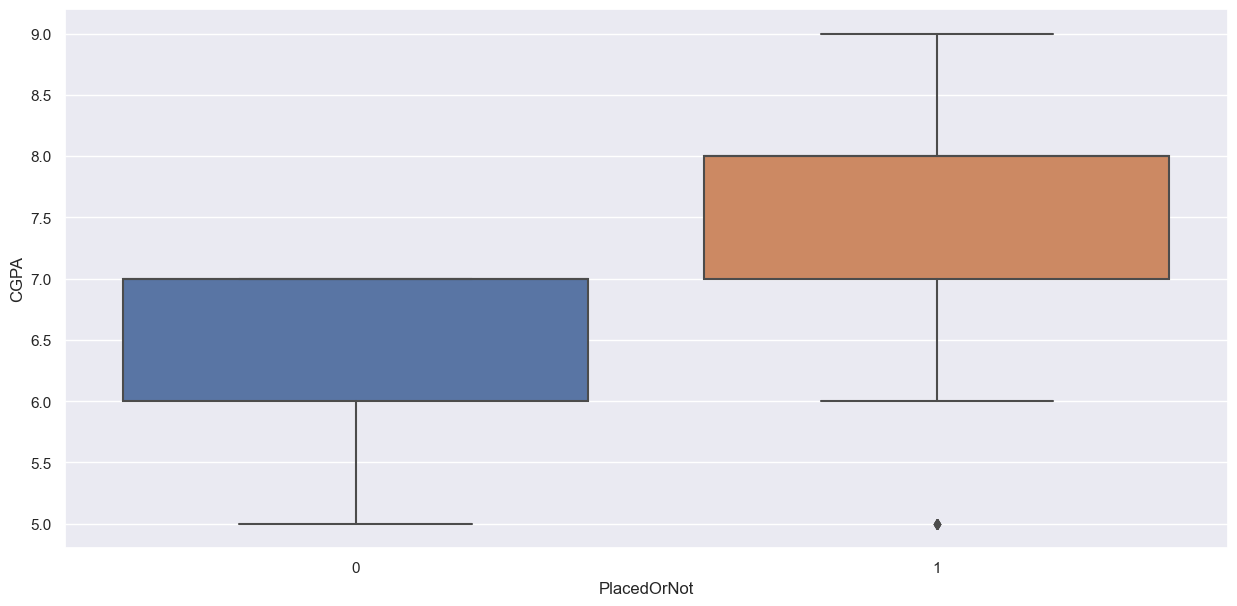

In [106]:
import seaborn as sns

sns.boxplot(y = df.CGPA, x = df.PlacedOrNot)
plt.show()

In [13]:
X

,Age,Gender,Branch,Internships,CGPA,HistoryOfBacklogs
0,22,1,2,1,8,1
1,21,0,0,0,7,1
2,22,0,1,1,6,0
3,21,1,1,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,1,0,7,0
2962,23,1,3,1,7,0
2963,22,1,1,1,7,0
2964,22,1,0,1,7,0


## train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [16]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2966,) (2372,) (594,)


## K - Nearest Neighbors

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X)

MinMaxScaler()

In [20]:
X = scaler.transform(X)
X

array([[0.27272727, 1.        , 0.4       , 0.33333333, 0.75      ,
        1.        ],
       [0.18181818, 0.        , 0.        , 0.        , 0.5       ,
        1.        ],
       [0.27272727, 0.        , 0.2       , 0.33333333, 0.25      ,
        0.        ],
       ...,
       [0.27272727, 1.        , 0.2       , 0.33333333, 0.5       ,
        0.        ],
       [0.27272727, 1.        , 0.        , 0.33333333, 0.5       ,
        0.        ],
       [0.36363636, 1.        , 1.        , 0.        , 0.75      ,
        0.        ]])

In [21]:
acc = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    ac = accuracy_score(Y_test, Y_pred)
    acc.append(ac)

maximum acc = 0.8703703703703703 at k = 4


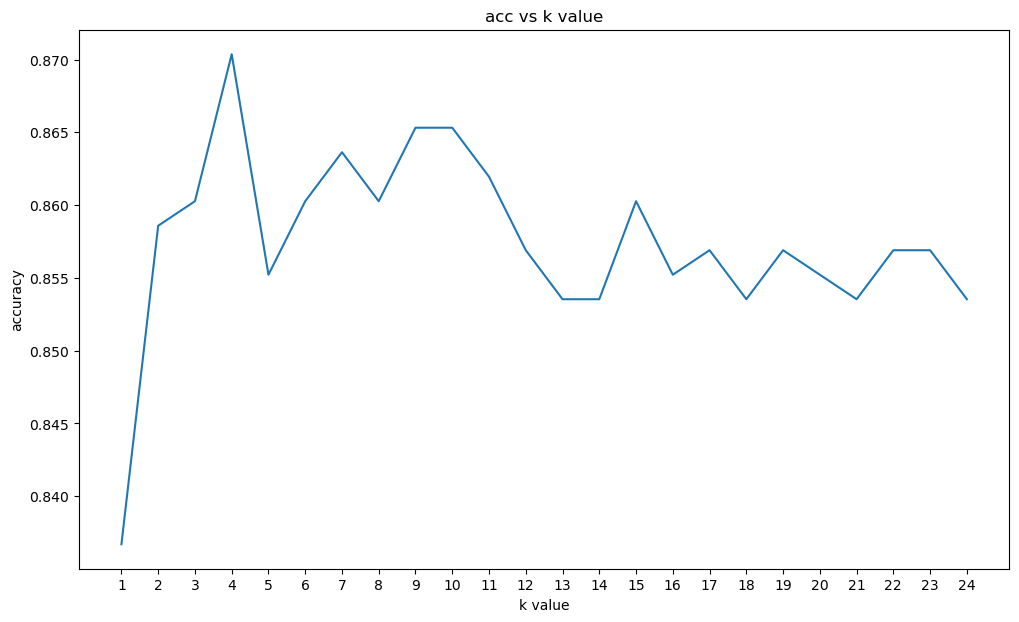

In [22]:
plt.figure(figsize = (12, 7))
plt.plot(range(1, 25),  acc)
plt.title("acc vs k value")
plt.xlabel("k value")
plt.xticks(range(1, 25))
plt.ylabel("accuracy")
print(f"maximum acc = {max(acc)} at k = {np.array(acc).argmax() + 1}")
plt.show()

In [68]:
Knn = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean")
Knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [69]:
Y_pred = Knn.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [70]:
Y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

accuracy_KNN = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

## Output characteristics of KNN

In [72]:
print(f"Accuracy: {accuracy_KNN}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8468013468013468

Confusion Matrix:
[[257  23]
 [ 68 246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       280
           1       0.91      0.78      0.84       314

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.86      0.85      0.85       594



## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [75]:
Y_pred = dtree.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [76]:
Y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy_Decison_Tree = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

## Output characteristics of Decision Tree 

In [88]:
print(f"Accuracy: {accuracy_Decision_Tree}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8636363636363636

Confusion Matrix:
[[257  23]
 [ 68 246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       280
           1       0.91      0.78      0.84       314

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.86      0.85      0.85       594



## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [81]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [82]:
Y_pred = Knn.predict(X_test)

In [84]:
accuracy_Random_Forest = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

## Output characteristics of Random Forest

In [85]:
# Display the results

print(f"Accuracy: {accuracy_Random_Forest}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8468013468013468

Confusion Matrix:
[[257  23]
 [ 68 246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       280
           1       0.91      0.78      0.84       314

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.86      0.85      0.85       594



## Naive Bayes

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [92]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [93]:
Y_test

2395    0
794     1
1894    1
332     0
2023    0
       ..
1938    1
2607    1
1395    0
602     1
2308    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [94]:
# Evaluate the model

accuracy_Naive_Bayes = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

## Output characteristics of Naive Bayes

In [95]:
print(f"Accuracy: {accuracy_Naive_Bayes}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7744107744107744

Confusion Matrix:
[[222  58]
 [ 76 238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       280
           1       0.80      0.76      0.78       314

    accuracy                           0.77       594
   macro avg       0.77      0.78      0.77       594
weighted avg       0.78      0.77      0.77       594



## Support Vector Machine

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# Create an SVM model

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [100]:
# Make predictions on the test set

Y_pred = svm_model.predict(X_test)

In [101]:
# Evaluate the model

accuracy_SVM = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

## Output characteristics of SVM

In [102]:
print(f"Accuracy: {accuracy_SVM}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7289562289562289

Confusion Matrix:
[[199  81]
 [ 80 234]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       280
           1       0.74      0.75      0.74       314

    accuracy                           0.73       594
   macro avg       0.73      0.73      0.73       594
weighted avg       0.73      0.73      0.73       594



## Final Charts and Outputs

In [104]:
algorithms=['K Nearest Neighbors','Decision Tree','Random Forest ','Gaussian Naive Bayes', 'Support Vector Machine']
scores=[accuracy_KNN,accuracy_Decision_Tree,accuracy_Random_forest,accuracy_Naive_Bayes,accuracy_SVM]

<Axes: xlabel='\nAlgorithms', ylabel='Accuracy score'>

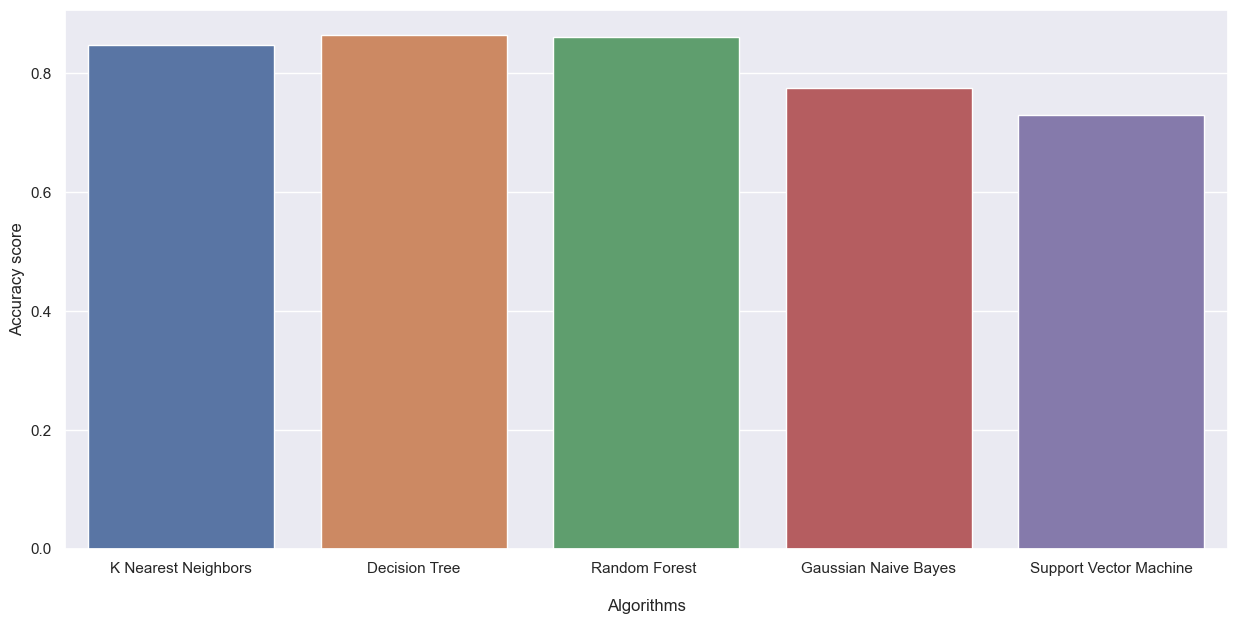

In [105]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("\nAlgorithms")
plt.ylabel("Accuracy score")
sns.barplot(x = algorithms,y = scores)